Problem Description :

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as ss

This is a classifier problem

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic Regression Assumptions

Binary logistic regression requires the dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
Only the meaningful variables should be included.
The independent variables should be independent of each other. That is, the model should have little or no   multicollinearity.
The independent variables are linearly related to the log odds.
Logistic regression requires quite large sample sizes.

Acquire data The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames.

In [60]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12661 entries, 0 to 12660
Data columns (total 11 columns):
ID                      12661 non-null int64
Agency                  12661 non-null object
Agency Type             12661 non-null object
Distribution Channel    12661 non-null object
Product Name            12661 non-null object
Duration                12661 non-null int64
Destination             12661 non-null object
Net Sales               12661 non-null float64
Commision (in value)    12661 non-null float64
Gender                  3605 non-null object
Age                     12661 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.1+ MB


Now we have basic information about the data.

In [63]:
train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [64]:
print('Percentage of missing data in Gender column of train dataset :', (train['Gender'].isnull().sum()/
                                                                         len(train['Gender']))*100,'%')

Percentage of missing data in Gender column of train dataset : 71.11941922338931 %


In [65]:
test.isnull().sum()

ID                         0
Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  9056
Age                        0
dtype: int64

In [66]:
print('Percentage of missing data in Gender column of test dataset :', (test['Gender'].isnull().sum()/
                                                                        len(test['Gender']))*100,'%')

Percentage of missing data in Gender column of test dataset : 71.52673564489376 %


Now we know about the missing data in our datasets, so we can make decisions accordingly

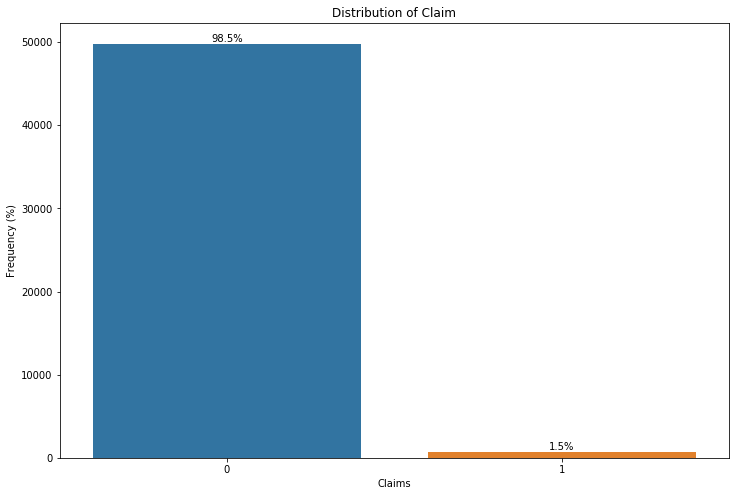

In [67]:
ncount = len(train['Claim'])

plt.figure(figsize=(12,8))
ax = sns.countplot(x='Claim', data=train)
plt.title('Distribution of Claim')
plt.xlabel('Claims')
plt.ylabel('Frequency (%)')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text



From the above plot we can see that the target variable (Claim) in highly imbalanced

As 1 is the minority class, we can assume that 1 indicates that travel insurance claim is rejected & 0 indicates
that travel insurance claim is accepted.

In [68]:
print(train.groupby('Product Name')['Claim'].value_counts(normalize=True) * 100)

Product Name                          Claim
1 way Comprehensive Plan              0         99.697885
                                      1          0.302115
2 way Comprehensive Plan              0         98.941042
                                      1          1.058958
24 Protect                            0        100.000000
Annual Gold Plan                      0         88.513514
                                      1         11.486486
Annual Silver Plan                    0         88.927336
                                      1         11.072664
Annual Travel Protect Gold            0         87.654321
                                      1         12.345679
Annual Travel Protect Platinum        0         97.777778
                                      1          2.222222
Annual Travel Protect Silver          0         94.520548
                                      1          5.479452
Basic Plan                            0         99.565814
                            

Now we know about claim acceptance and rejection with respect to Product

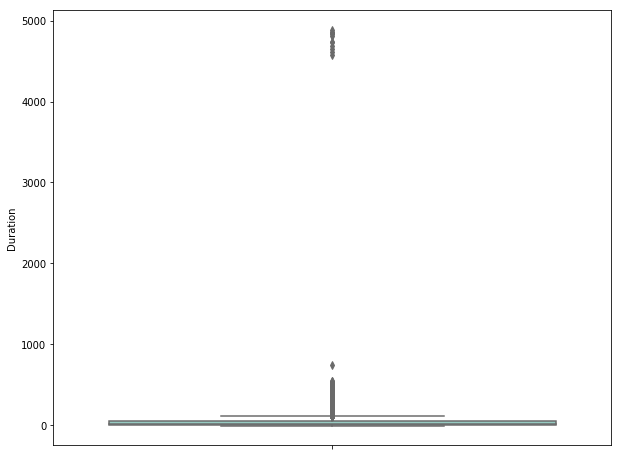

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Duration", data=train, palette="Set3", orient='v')

With the help of this box plot we can see the outliers in Duration

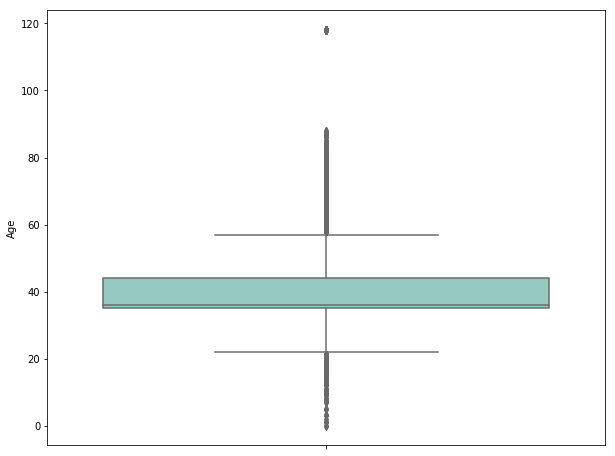

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Age", data=train, palette="Set3", orient='v')

With the help of this box plot we can see the outliers in Age

Text(0.5, 1.0, 'Histogram of Age')

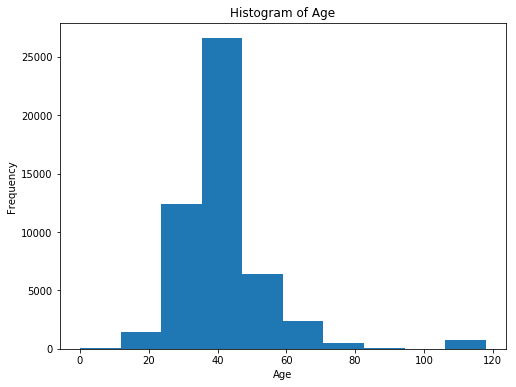

In [71]:
plt.figure(figsize=(8,6))
plt.hist(train['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

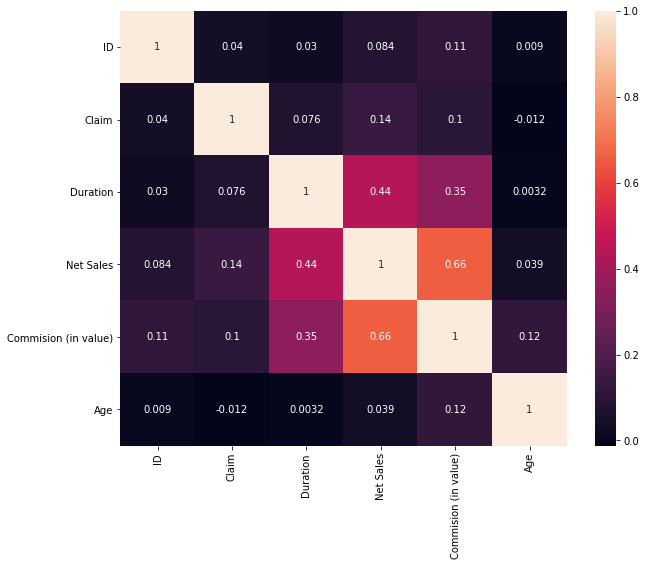

In [72]:
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(), xticklabels=1,yticklabels=1,cbar=True, annot = True)

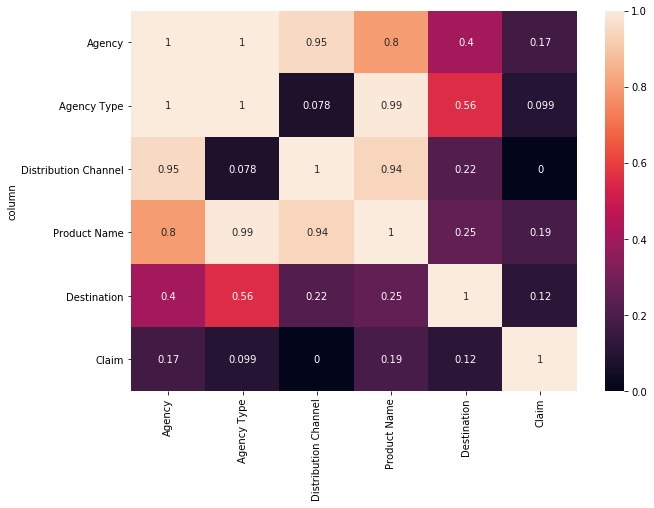

In [73]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

train_categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Claim']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in train_categorical] for i in train_categorical})
cramers['column']=[i for i in train_categorical if i not in ['id']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

From this heatmap we can conclude Agency and Agency Type is highly correlated , so we will drop the Agency Type

In [74]:
ID = test['ID']
train.drop(columns = ['ID', 'Agency Type', 'Gender'], inplace = True)

test.drop(columns = ['ID', 'Agency Type', 'Gender'], inplace = True)

In [75]:
train[train['Duration'] > 750]

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
12083,SSI,Online,Ticket Protector,0,4609,SINGAPORE,0.32,0.09,48
15326,SSI,Online,Ticket Protector,0,4580,SINGAPORE,0.32,0.09,48
16797,SSI,Online,Ticket Protector,0,4685,SINGAPORE,0.32,0.09,48
17702,SSI,Online,Ticket Protector,0,4736,SINGAPORE,0.32,0.09,48
23844,SSI,Online,Ticket Protector,0,4844,SINGAPORE,0.32,0.09,48
27270,SSI,Online,Ticket Protector,0,4857,SINGAPORE,0.32,0.09,48
28143,SSI,Online,Ticket Protector,0,4815,SINGAPORE,0.32,0.09,48
30465,SSI,Online,Ticket Protector,0,4652,SINGAPORE,0.32,0.09,48
31070,SSI,Online,Ticket Protector,0,4829,SINGAPORE,0.32,0.09,48
42137,SSI,Online,Ticket Protector,0,4738,SINGAPORE,0.32,0.09,48


Since there are few number of outliers, Therefore we can drop these records

In [76]:
train.drop(train[train['Duration'] > 750].index, inplace = True)

In [77]:
train[train['Age'] > 100]

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Online,Value Plan,0,0,INDIA,31.0,12.40,118
321,EPX,Offline,2 way Comprehensive Plan,1,10,MALAYSIA,20.0,0.00,118
392,JWT,Online,Value Plan,0,19,INDIA,31.0,12.40,118
610,EPX,Offline,2 way Comprehensive Plan,0,13,CHINA,20.0,0.00,118
704,ART,Online,Value Plan,0,42,HONG KONG,61.0,21.35,118
731,JZI,Online,Basic Plan,0,115,HONG KONG,40.0,14.00,118


For the outliers in Age we can replace them with the median

In [78]:
train['Age'].values[train['Age'].values > 100] = train['Age'].median()
test['Age'].values[test['Age'].values > 100] = test['Age'].median()

Now we have to split the data for training our model

In [80]:
X_train = train.drop(columns = 'Claim')
y_train = train['Claim']

X_test = test

Label Encoding the Categorical Columns

In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_train['Agency'] = le.fit_transform(X_train['Agency'])
X_train['Product Name'] = le.fit_transform(X_train['Product Name'])
X_train['Destination'] = le.fit_transform(X_train['Destination'])
X_train['Distribution Channel'] = le.fit_transform(X_train['Distribution Channel'])

X_test['Agency'] = le.fit_transform(X_test['Agency'])
X_test['Product Name'] = le.fit_transform(X_test['Product Name'])
X_test['Destination'] = le.fit_transform(X_test['Destination'])
X_test['Distribution Channel'] = le.fit_transform(X_test['Distribution Channel'])

Due to imbalance of target variable (Claim), we have to resample our data for making the target variable balanced.

In [82]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_smotee, y_smotee = smote_enn.fit_resample(X_train, y_train)

In [88]:
print('Total number of 0s after resampling :', len(y_smotee[y_smotee == 0]))
print('Total number of 1s after resampling :', len(y_smotee[y_smotee == 1]))
print('Total number of records after resampling :', len(y_smotee))

Total number of 0s after resampling : 44276
Total number of 1s after resampling : 47059
Total number of records after resampling : 91335


In [45]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_smotee, y_smotee)
logreg_pred = logreg.predict(X_test)


C:\Users\PANNU22\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
submission = pd.DataFrame({
        "ID": ID,
        "Claim": logreg_pred
    })

In [47]:
submission.to_csv('C:\\Users\\PANNU22\\Documents\\Data Science\\Hackathon\\output\\submission5.csv', index=False)

After submitting the predictions we were able to acheive the Precision Score of 0.93